In [1]:
import numpy as np
import napari

import matplotlib.pyplot as plt

from skimage.io import imread, imsave
from skimage import exposure, restoration

from tqdm.notebook import tqdm

In [2]:
%matplotlib inline

## Start napari

In [3]:
viewer = napari.Viewer()

/opt/anaconda3/envs/cellpose/lib/python3.8/site-packages/napari_tools_menu/__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


## Load image and add channels to Napari

In [4]:
im = imread('../mc1_cp27_p62_hipp_stitched.tif')
im = im[1:, :, :, :]

In [6]:
im.shape

(18, 20, 2304, 6452)

In [7]:
viewer.add_image(im[:, 0, :, :], name='dapi', blending='additive', colormap='bop blue', scale=[1,1,1])

<Image layer 'dapi' at 0x7fad66b838b0>

In [8]:
viewer.add_image(im[:, 9, :, :], name='mc1', blending='additive', colormap='bop orange', scale=[1,1,1])

<Image layer 'mc1' at 0x7fad543e7a00>

In [9]:
viewer.add_image(im[:, 14, :, :], name='p62', blending='additive', scale=[1,1,1])

<Image layer 'p62' at 0x7fad554a33a0>

In [10]:
viewer.add_image(im[:, 19, :, :], name='cp27', blending='additive', colormap='bop purple', scale=[1,1,1])

<Image layer 'cp27' at 0x7fad56e842b0>

In [11]:
viewer.add_image(im[:, 6, :, :], name='lf', blending='additive', colormap='cyan', scale=[1,1,1])

<Image layer 'lf' at 0x7fad58a15e20>

## Load nuclear segmentation

In [12]:
# Reload segmentation
dat = np.load('../full_hipp_seg.npy', allow_pickle=True).item()

In [13]:
viewer.add_labels(dat['masks'])

<Labels layer 'Labels' at 0x7fad41937550>

## Improve picture quality

In [ ]:
mc1_bckgnd = restoration.rolling_ball(im[:, 9, :, :])

# Illustration

In [178]:
# Import napari colormaps

from matplotlib.colors import ListedColormap

bopblue = ListedColormap(napari.utils.colormaps.bop_colors.bop_blue)
boporange = ListedColormap(napari.utils.colormaps.bop_colors.bop_orange)
boppurple = ListedColormap(napari.utils.colormaps.bop_colors.bop_purple)
#cyan = napari.utils.colormaps.SIMPLE_COLORMAPS['cyan']

In [100]:
def plot_style(figsize=(6, 12), labelsize=12, titlesize=24, ticklabelsize=12, **kwargs):
    basic_style = {
       'figure.figsize': figsize,
       'axes.labelsize': labelsize,
       'axes.titlesize': titlesize,
       'xtick.bottom' : False,
        'xtick.labelbottom': False,
       'ytick.left' : False,
        'ytick.labelleft' : False,
       #'xtick.labelsize': ticklabelsize,
       #'ytick.labelsize': ticklabelsize,
       'axes.spines.top': False,
       'axes.spines.bottom': False,
       'axes.spines.right': False,
       'axes.spines.left': False,
       'axes.grid': False,
       
       #Distance between plots
       'figure.subplot.bottom': 0.1,
       'figure.subplot.hspace': 0.05,
       'figure.subplot.left': 0.1,
       'figure.subplot.right': 0.9,
       'figure.subplot.top': 0.9,
       'figure.subplot.wspace': 0.05,    
       
   }
    basic_style.update(kwargs)
    return plt.rc_context(rc=basic_style)

# If looking for more parameters check in plt.rcParams.keys()

In [20]:
#Create layer to select ROI
viewer.add_shapes(name='ROI', face_color='r')

<Shapes layer 'ROI' at 0x7fb67b3a9700>

In [21]:
# Crop image using rectangle ROI
roi_coords = viewer.layers['ROI'].data[0]

In [22]:
ymax, xmax = int(roi_coords.max(axis=0)[0]), int(roi_coords.max(axis=0)[1])
ymin, xmin = int(roi_coords.min(axis=0)[0]), int(roi_coords.min(axis=0)[1])

In [23]:
cropped = im[9, :, ymin:ymax, xmin:xmax]

In [1]:
with plot_style(figsize=(10,8)):

    plt.subplot(321)

    dapi = cropped[0, :, :]
    dapi_pct = np.percentile(dapi, (10, 99.5))
    plt.imshow(exposure.rescale_intensity(dapi, in_range=tuple(dapi_pct)), cmap=bopblue)
    plt.text(x=50, y=100, s="DAPI (405)", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})

    plt.subplot(322)
    mc1 = cropped[9, :, :]
    mc1_pct = np.percentile(dapi, (10, 99.5))
    plt.imshow(exposure.rescale_intensity(mc1, in_range=tuple(mc1_pct)), cmap=boporange)
    plt.text(x=50, y=100, s="MC1 (488)", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})
    
    plt.subplot(323)
    cp27 = cropped[19, :, :]
    cp27_pct = np.percentile(cp27, (10, 99.5))
    plt.imshow(exposure.rescale_intensity(cp27, in_range=tuple(cp27_pct)), cmap=boppurple)
    plt.text(x=50, y=100, s="CP27 (640)", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})

    plt.subplot(324)
    p62 = cropped[14, :, :]
    p62_pct = np.percentile(p62, (10, 99.5))
    plt.imshow(exposure.rescale_intensity(p62, in_range=tuple(p62_pct)), cmap='Greys_r')
    plt.text(x=50, y=100, s="p62 (555)", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})

    plt.subplot(325)
    lf = cropped[6, :, :]
    lf_pct = np.percentile(lf, (20, 99.5))
    plt.imshow(exposure.rescale_intensity(lf, in_range=tuple(lf_pct)), cmap='Greys_r')
    plt.text(x=50, y=100, s="LF", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})

plt.tight_layout()
plt.savefig('Panel-2hIIr.pdf', dpi=300)

plt.show()

NameError: name 'plot_style' is not defined

## Antibody diffusion along Z

In [118]:
yz = im[:, :, ymin:ymax, xmin:xmax].sum(axis=3)

In [120]:
# Swap axis between color channel (1), and zplanes (0) to avoid change the plot code below 
yz = np.moveaxis(yz, [0, 1], [1, 0])

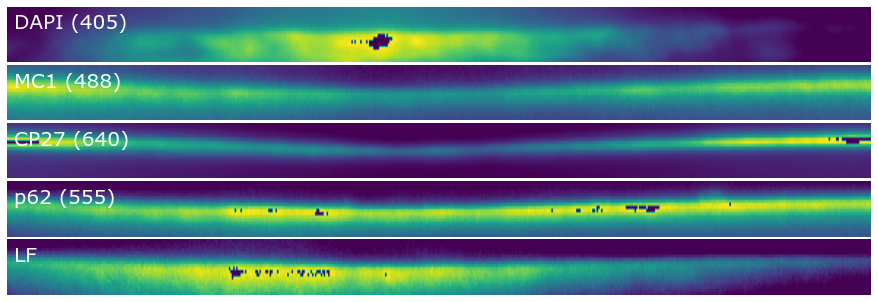

In [160]:
with plot_style(figsize=(15,5)):
    
    # Position fo the dye legend
    leg_x, leg_y = 5, 12
    
    plt.subplot(511)

    dapi = yz[0, :, :]
    dapi_pct = np.percentile(dapi, (10, 99.5))
    plt.imshow(exposure.rescale_intensity(dapi, in_range=tuple(dapi_pct)), extent=[0, 592, 0, 20], aspect='auto')
    plt.text(x=leg_x, y=leg_y, s="DAPI (405)", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})

    plt.subplot(512)
    mc1 = yz[9, :, :]
    mc1_pct = np.percentile(dapi, (10, 99.5))
    plt.imshow(exposure.rescale_intensity(mc1, in_range=tuple(mc1_pct)), 
               extent=[0, 592, 0, 20], aspect='auto')
    plt.text(x=leg_x, y=leg_y, s="MC1 (488)", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})
    
    plt.subplot(513)
    cp27 = yz[19, :, :]
    cp27_pct = np.percentile(cp27, (10, 99.5))
    plt.imshow(exposure.rescale_intensity(cp27, in_range=tuple(cp27_pct)), extent=[0, 592, 0, 20], aspect='auto')
    plt.text(x=leg_x, y=leg_y, s="CP27 (640)", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})

    plt.subplot(514)
    p62 = yz[14, :, :]
    p62_pct = np.percentile(p62, (10, 99.5))
    plt.imshow(exposure.rescale_intensity(p62, in_range=tuple(p62_pct)), extent=[0, 592, 0, 20], aspect='auto')
    plt.text(x=leg_x, y=leg_y, s="p62 (555)", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})

    plt.subplot(515)
    lf = yz[6, :, :]
    lf_pct = np.percentile(lf, (20, 99.5))
    plt.imshow(exposure.rescale_intensity(lf, in_range=tuple(lf_pct)), extent=[0, 592, 0, 20], aspect='auto')
    plt.text(x=leg_x, y=leg_y, s="LF", fontdict={'font': 'Verdana', 'size': 20, 'color': 'w'})


plt.savefig('xz_plots.pdf', dpi=300)

plt.show()